In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/readyforEDA.csv')
df.head()






,player_id,fifa_version,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,attacker_position,midfielder_position,defender_position,improvement_1_year,improvement_2_years,improvement_3_years,big_potential
0,16,17.0,70,70,35,177,69,1,3,3,...,37,46,42,1,1,0,-11,15,0,0
1,16,18.0,70,70,36,178,65,1,3,3,...,37,46,42,0,1,0,26,0,0,0
2,16,19.0,70,70,37,178,65,1,4,3,...,68,43,40,0,1,0,0,0,0,0
3,41,17.0,88,88,32,171,68,1,4,4,...,57,57,56,0,1,0,-34,-37,-65,0
4,41,18.0,87,87,33,171,68,1,4,4,...,57,57,56,0,1,0,-3,-31,-73,0


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130711 entries, 0 to 130710
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    130711 non-null  int64  
 1   fifa_version                 130711 non-null  float64
 2   overall                      130711 non-null  int64  
 3   potential                    130711 non-null  int64  
 4   age                          130711 non-null  int64  
 5   height_cm                    130711 non-null  int64  
 6   weight_kg                    130711 non-null  int64  
 7   preferred_foot               130711 non-null  int64  
 8   weak_foot                    130711 non-null  int64  
 9   skill_moves                  130711 non-null  int64  
 10  pace                         130711 non-null  float64
 11  shooting                     130711 non-null  float64
 12  passing                      130711 non-null  float64
 13 

In [33]:
df = df[df['improvement_3_years'] != 0]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 41458 entries, 3 to 118466
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    41458 non-null  int64  
 1   fifa_version                 41458 non-null  float64
 2   overall                      41458 non-null  int64  
 3   potential                    41458 non-null  int64  
 4   age                          41458 non-null  int64  
 5   height_cm                    41458 non-null  int64  
 6   weight_kg                    41458 non-null  int64  
 7   preferred_foot               41458 non-null  int64  
 8   weak_foot                    41458 non-null  int64  
 9   skill_moves                  41458 non-null  int64  
 10  pace                         41458 non-null  float64
 11  shooting                     41458 non-null  float64
 12  passing                      41458 non-null  float64
 13  dribbling           

,player_id,fifa_version,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,attacker_position,midfielder_position,defender_position,improvement_1_year,improvement_2_years,improvement_3_years,big_potential
3,41,17.0,88,88,32,171,68,1,4,4,...,57,57,56,0,1,0,-34,-37,-65,0
4,41,18.0,87,87,33,171,68,1,4,4,...,57,57,56,0,1,0,-3,-31,-73,0
5,41,19.0,87,87,34,171,68,1,4,4,...,67,57,56,0,1,0,-28,-70,-145,0
9,80,17.0,76,76,35,170,72,0,3,2,...,64,66,65,0,1,0,25,22,4,0
19,768,17.0,75,75,31,188,75,0,3,2,...,80,80,76,0,0,1,-31,-55,-93,0


In [34]:
df['big_potential'].value_counts()

big_potential
0    31162
1    10296
Name: count, dtype: int64

In [35]:
att_df = df[df['attacker_position'] == 1]
mid_df = df[df['midfielder_position'] == 1]
def_df = df[df['defender_position'] == 1]




In [36]:
file_path = '../data/Attackers.csv'
att_df.to_csv(file_path, index=False)

print(f'DataFrame att_df has been saved as {file_path}')

file_path1 = '../data/Midfielders.csv'
mid_df.to_csv(file_path1, index=False)

print(f'DataFrame mid_df has been saved as {file_path1}')

file_path2 = '../data/Defenders.csv'
def_df.to_csv(file_path2, index=False)

print(f'DataFrame def_df has been saved as {file_path2}')

DataFrame att_df has been saved as ../data/Attackers.csv
DataFrame mid_df has been saved as ../data/Midfielders.csv
DataFrame def_df has been saved as ../data/Defenders.csv


In [37]:
independent_variables = ['age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'preferred_foot', 'attacker_position', 'midfielder_position',
       'defender_position']

target_variable = "big_potential"
X = df[independent_variables]
y = df[target_variable]

clf = RandomForestClassifier()
clf.fit(X, y)

feature_importance = clf.feature_importances_

threshold = 0.024 

feature_importance_df = pd.DataFrame({'Feature': independent_variables, 'Importance': feature_importance})

selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print(selected_features)

                       Feature  Importance
0                          age    0.069927
10                      physic    0.025986
11          attacking_crossing    0.025689
13  attacking_heading_accuracy    0.026757
14     attacking_short_passing    0.024123
15           attacking_volleys    0.026941
16             skill_dribbling    0.024185
17                 skill_curve    0.024965
18           skill_fk_accuracy    0.025295
19          skill_long_passing    0.024652
20          skill_ball_control    0.025938
23            movement_agility    0.025583
24          movement_reactions    0.024397
25            movement_balance    0.025558
26            power_shot_power    0.025126
27               power_jumping    0.028343
28               power_stamina    0.027038
29              power_strength    0.024604
30            power_long_shots    0.024866
31        mentality_aggression    0.027110
32     mentality_interceptions    0.026769
33       mentality_positioning    0.024370
34         

/var/folders/06/_wjmyc_97cn0n7hx93prnq000000gn/T/ipykernel_32862/2299784970.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target[sorted_features].index, y=correlation_with_target[sorted_features].values, palette="coolwarm_r")  # "_r" reverses the color order


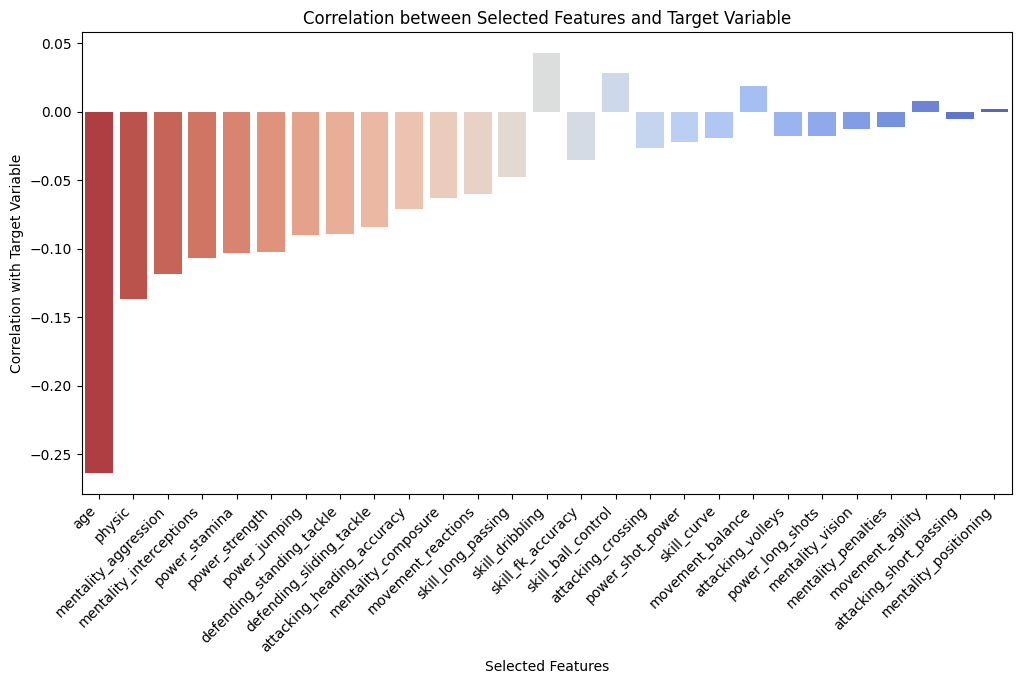

In [38]:
selected_features_with_target = df[selected_features['Feature'].values].copy()
selected_features_with_target[target_variable] = df[target_variable]

correlation_with_target = selected_features_with_target.corr()[target_variable].drop(target_variable)

sorted_features = correlation_with_target.abs().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target[sorted_features].index, y=correlation_with_target[sorted_features].values, palette="coolwarm_r")  # "_r" reverses the color order

plt.xlabel("Selected Features")
plt.ylabel("Correlation with Target Variable")
plt.title("Correlation between Selected Features and Target Variable")
plt.xticks(rotation=45, ha="right")
plt.show()

In [39]:
# Create df_selected with only the sorted features and the target variable
df_selected = df[sorted_features.tolist() + [target_variable]].copy()
df_selected["big_potential"].value_counts()


big_potential
0    31162
1    10296
Name: count, dtype: int64

In [40]:
len(df_selected.columns)


28

In [41]:
df_selected.head()

,age,physic,mentality_aggression,mentality_interceptions,power_stamina,power_strength,power_jumping,defending_standing_tackle,defending_sliding_tackle,attacking_heading_accuracy,...,skill_curve,movement_balance,attacking_volleys,power_long_shots,mentality_vision,mentality_penalties,movement_agility,attacking_short_passing,mentality_positioning,big_potential
3,32,60.0,58,68,64,59,54,57,56,54,...,80,86,74,74,94,71,82,92,85,0
4,33,58.0,58,66,58,58,52,57,56,54,...,80,84,74,71,94,71,79,92,84,0
5,34,57.0,58,66,55,58,47,57,56,54,...,80,84,74,71,94,71,79,92,84,0
9,35,66.0,87,68,51,64,72,66,65,43,...,81,84,69,77,77,85,66,83,67,0
19,31,66.0,70,81,55,69,70,80,76,74,...,49,63,19,40,46,35,52,62,29,0


In [42]:
file_path = '../data/feature_engineered_data.csv'
df_selected.to_csv(file_path, index=False)

print(f'DataFrame df_selected has been saved as {file_path}')

DataFrame df_selected has been saved as ../data/feature_engineered_data.csv
